In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
#sample_representative_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')
testing_dataset = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
training_dataset = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

In [3]:
training_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
training_dataset.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [5]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [6]:
testing_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [7]:
testing_dataset.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,50000.000000,48221.000000,50000.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000
mean,0.730280,1.358309,3.999013,1.567014,132.208160,132.559300,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133
std,0.444584,0.879948,78.958759,6.875115,76.483766,76.410602,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000
25%,0.000000,1.000000,1.090000,1.000000,66.000000,67.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.850000,1.000000,132.000000,133.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,3.600000,1.000000,199.000000,199.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000
max,2.000000,8.000000,17624.430000,99.000000,264.000000,264.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000


In [8]:
testing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [9]:
testing_shape = testing_dataset.shape
training_shape = training_dataset.shape

print(testing_shape)
print(training_shape)

(50000, 16)
(175000, 17)


In [10]:
training_dataset.select_dtypes(include=['int','float']).columns.tolist()

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [11]:
'''
#Dummy Regressor

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

training_dataset = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')


X = training_dataset.drop(columns=['total_amount'])
y = training_dataset['total_amount']
dummy_regressor = DummyRegressor(strategy='mean')  


dummy_regressor.fit(X,y)

X_testing=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
y_prediction = dummy_regressor.predict(X_testing)
'''

'\n#Dummy Regressor\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.dummy import DummyRegressor\n\ntraining_dataset = pd.read_csv(\'/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv\')\n\n\nX = training_dataset.drop(columns=[\'total_amount\'])\ny = training_dataset[\'total_amount\']\ndummy_regressor = DummyRegressor(strategy=\'mean\')  \n\n\ndummy_regressor.fit(X,y)\n\nX_testing=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")\ny_prediction = dummy_regressor.predict(X_testing)\n'

In [12]:
'''
submission = pd.DataFrame({"ID": np.arange(1,50001), 
                           "total_amount": y_prediction}) 

submission.to_csv('submission.csv',index=False)
'''

'\nsubmission = pd.DataFrame({"ID": np.arange(1,50001), \n                           "total_amount": y_prediction}) \n\nsubmission.to_csv(\'submission.csv\',index=False)\n'

# **Data Exploration and Data Cleaning**

In [13]:
#Creating a copy of Train and Test data
train_copy = training_dataset.copy()
test_copy = testing_dataset.copy()

In [14]:
#Exploratory Data Analysis on training data
# Displaying basic statistics of numerical features
print(train_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [15]:
# Display columns in train_copy
print("Columns in train_copy:")
print(train_copy.columns)

Columns in train_copy:
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


# **Summary Statistics for Numerical Variables**

In [16]:
# Display summary statistics for numeric columns
numeric_columns= ['passenger_count','trip_distance','extra','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee']
print("Summary Statistics for Numeric Columns:")
print(train_copy.describe())

Summary Statistics for Numeric Columns:
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  175000.000000    168923.000000  175000.000000  168923.000000   
mean        0.728377         1.357678       5.145930       1.518307   
std         0.445606         0.891283     394.971052       6.514678   
min         0.000000         0.000000       0.000000       1.000000   
25%         0.000000         1.000000       1.080000       1.000000   
50%         1.000000         1.000000       1.840000       1.000000   
75%         1.000000         1.000000       3.610000       1.000000   
max         2.000000         9.000000  135182.060000      99.000000   

        PULocationID   DOLocationID          extra     tip_amount  \
count  175000.000000  175000.000000  175000.000000  175000.000000   
mean      132.710349     132.701429       1.932143       6.127497   
std        76.148799      76.192493       1.948497       4.610834   
min         1.000000       1.000000      -7.

# **Dropping Columns**

In [17]:
columns_to_drop = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID']

train_copy = train_copy.drop(columns=columns_to_drop)
test_copy = test_copy.drop(columns=columns_to_drop)

print(train_copy)

       tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2023-06-28 17:20:21   2023-06-28 16:34:45              1.0   
1       2023-06-29 23:05:01   2023-06-29 22:01:35              1.0   
2       2023-06-30 10:19:31   2023-06-30 11:13:10              1.0   
3       2023-06-29 13:23:09   2023-06-29 14:20:01              1.0   
4       2023-06-29 22:03:32   2023-06-29 22:22:22              3.0   
...                     ...                   ...              ...   
174995  2023-06-30 22:50:57   2023-06-30 22:22:22              3.0   
174996  2023-06-30 13:03:33   2023-06-30 14:04:57              1.0   
174997  2023-06-29 11:03:32   2023-06-29 12:13:34              1.0   
174998  2023-06-29 19:47:17   2023-06-29 19:08:55              1.0   
174999  2023-06-30 21:26:43   2023-06-30 22:54:42              1.0   

        trip_distance payment_type  extra  tip_amount  tolls_amount  \
0                2.14  Credit Card    2.5    7.165589           0.0   
1                

# **Finding the Missing Values**

In [18]:
#Finding the missing values
print("Missing Values in Training Data:")
print(train_copy.isnull().sum())

Missing Values in Training Data:
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64


In [19]:
#Handling all the missing values in both train and test datasets with SimpleImputer
from sklearn.impute import SimpleImputer

#Making a list of all columns to with missing values
incomplete_columns = ['passenger_count', 'congestion_surcharge', 'Airport_fee']

imputer = SimpleImputer(strategy = 'mean')

# Fitting the imputer for test and train sets both
train_copy[incomplete_columns] = imputer.fit_transform(train_copy[incomplete_columns])
test_copy[incomplete_columns] = imputer.fit_transform(test_copy[incomplete_columns])

In [20]:
#Verifying the Imputation
print("Missing Values in Training Data:")
print(train_copy.isnull().sum())

Missing Values in Training Data:
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


# **Visualization on Train Copy**

In [21]:
#Visualization on Train Copy

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as pl

In [22]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Select a subset of features for visualization
features_to_visualize = ['total_amount','passenger_count', 'trip_distance', 'extra', 'tip_amount', 'tolls_amount']

In [23]:
numerical_columns = ['passenger_count', 'trip_distance', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

# # Pairplot for selected features
# sns.pairplot(train_copy, vars=numerical_columns, diag_kind='kde', hue='total_amount')
# plt.suptitle('Pairplot of Selected Numerical Features and Total Amount', y=1.02)
# plt.show()

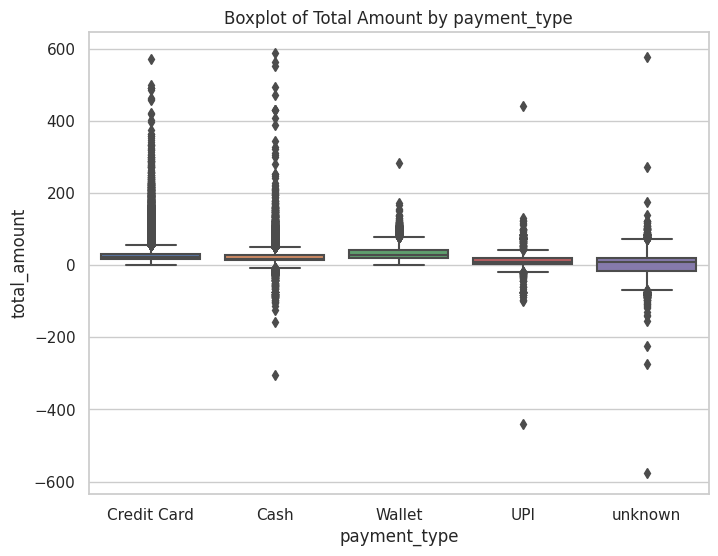

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplots for categorical features
categorical_columns = ['payment_type']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='total_amount', data=train_copy)
    plt.title(f'Boxplot of Total Amount by {column}')
    plt.show()

In [25]:
# #Pairplot for Numeric Features
# numeric_columns = train_copy_imputed.select_dtypes(include=['float64']).columns
# sns.pairplot(train_copy_imputed[numeric_columns], height=2)
# plt.show()

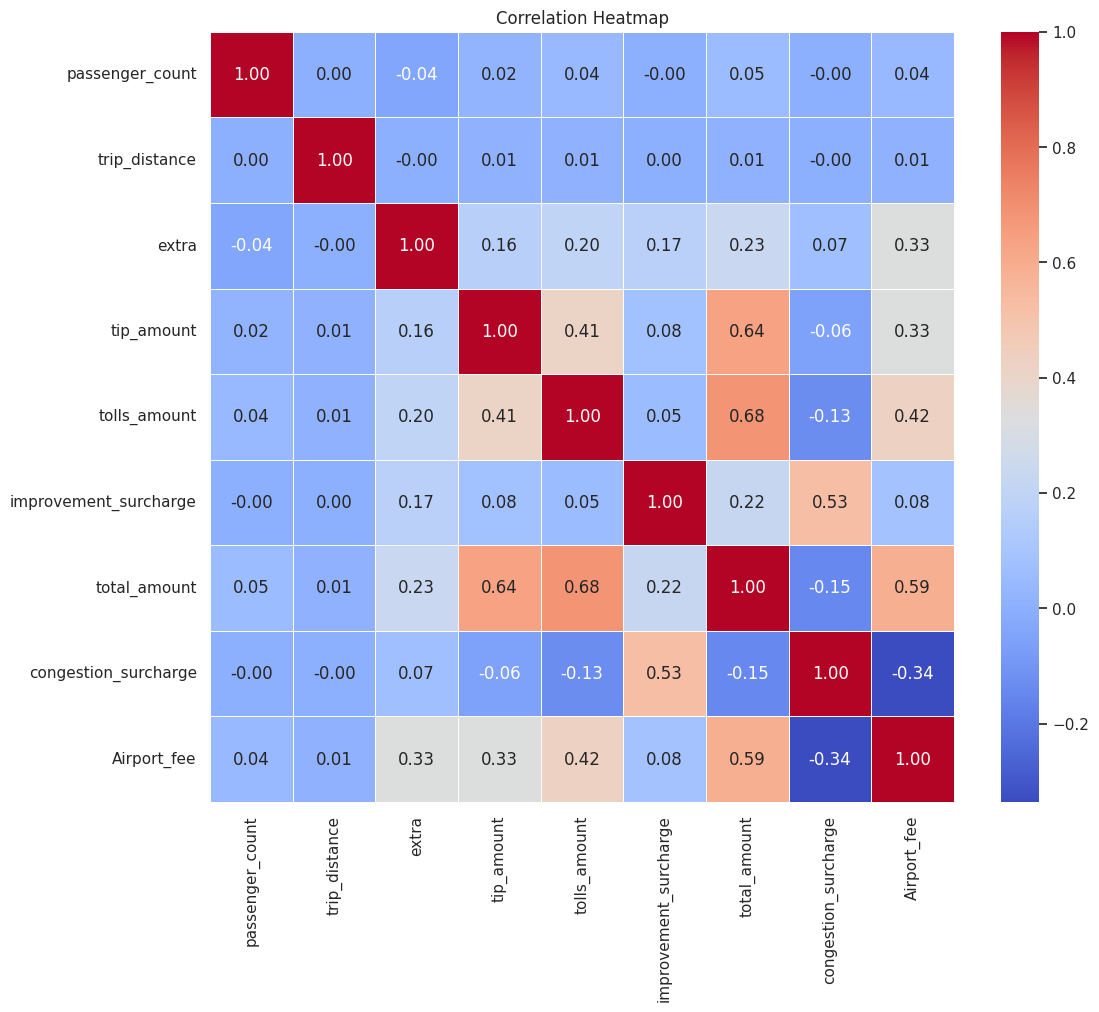

In [26]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_copy[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

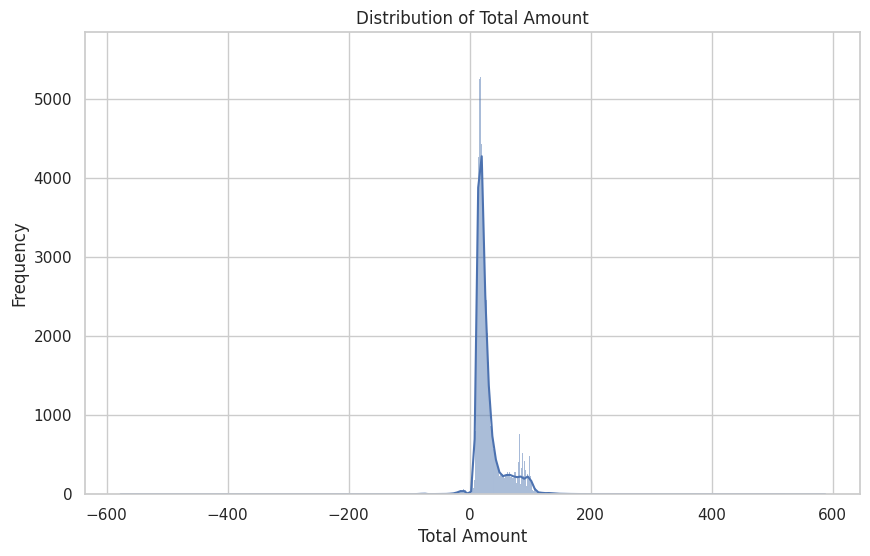

In [27]:
# Distribution plot for 'total_amount'
plt.figure(figsize=(10, 6))
sns.histplot(train_copy['total_amount'], kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# **Changing the datetime object to datetime variable**

In [28]:
import pandas as pd

In [29]:
train_copy['pickup_datetime'] = pd.to_datetime(train_copy['tpep_pickup_datetime'])
train_copy['dropoff_datetime'] = pd.to_datetime(train_copy['tpep_dropoff_datetime'])
test_copy['pickup_datetime'] = pd.to_datetime(test_copy['tpep_pickup_datetime'])
test_copy['dropoff_datetime'] = pd.to_datetime(test_copy['tpep_dropoff_datetime'])

In [30]:
train_copy=train_copy.drop(['tpep_pickup_datetime'], axis=1)
train_copy=train_copy.drop(['tpep_dropoff_datetime'], axis=1)
test_copy=test_copy.drop(['tpep_pickup_datetime'], axis=1)
test_copy=test_copy.drop(['tpep_dropoff_datetime'], axis=1)

In [31]:
# Calculate the duration in seconds
train_copy['duration_seconds'] = (train_copy['dropoff_datetime'] - train_copy['pickup_datetime']).dt.total_seconds()
test_copy['duration_seconds'] = (test_copy['dropoff_datetime'] - test_copy['pickup_datetime']).dt.total_seconds()

In [32]:
test_copy.shape

(50000, 12)

In [33]:
# Convert duration from seconds to minutes
train_copy['duration_minutes'] = train_copy['duration_seconds'] / 60
test_copy['duration_minutes'] = test_copy['duration_seconds'] / 60

# Drop the intermediate duration_seconds column if not needed
train_copy = train_copy.drop('duration_seconds', axis=1)
test_copy = test_copy.drop('duration_seconds', axis=1)

# # Filter out rows with negative durations
# negative_durations = train_copy['duration_minutes'] < 0
# train_copy = train_copy[~negative_durations]
# negative_durations = test_copy['duration_minutes'] < 0
# test_copy = test_copy[~negative_durations]

In [34]:
# Display the updated DataFrame after removing rows with negative durations
print(train_copy[['pickup_datetime', 'dropoff_datetime', 'duration_minutes']])

print(test_copy[['pickup_datetime', 'dropoff_datetime', 'duration_minutes']])

           pickup_datetime    dropoff_datetime  duration_minutes
0      2023-06-28 17:20:21 2023-06-28 16:34:45        -45.600000
1      2023-06-29 23:05:01 2023-06-29 22:01:35        -63.433333
2      2023-06-30 10:19:31 2023-06-30 11:13:10         53.650000
3      2023-06-29 13:23:09 2023-06-29 14:20:01         56.866667
4      2023-06-29 22:03:32 2023-06-29 22:22:22         18.833333
...                    ...                 ...               ...
174995 2023-06-30 22:50:57 2023-06-30 22:22:22        -28.583333
174996 2023-06-30 13:03:33 2023-06-30 14:04:57         61.400000
174997 2023-06-29 11:03:32 2023-06-29 12:13:34         70.033333
174998 2023-06-29 19:47:17 2023-06-29 19:08:55        -38.366667
174999 2023-06-30 21:26:43 2023-06-30 22:54:42         87.983333

[175000 rows x 3 columns]
          pickup_datetime    dropoff_datetime  duration_minutes
0     2023-06-29 00:21:20 2023-06-29 00:25:20          4.000000
1     2023-06-30 17:44:43 2023-06-30 17:53:13          8.500000
2

In [35]:
# # Filter rows with negative duration
# negative_duration = train_copy[train_copy['duration_minutes'] < 0]
# negative_duration2 = test_copy[test_copy['duration_minutes'] < 0]

# # Display the list of negative durations
# print("List of negative durations:")
# print(negative_duration['duration_minutes'])
# print(negative_duration['duration_minutes2'])

# # Count the occurrences of negative durations
# count_negative_duration = len(negative_duration)
# print(f"Count of negative durations in train: {count_negative_duration}")
# count_negative_duration2 = len(negative_duration2)
# print(f"Count of negative durations in test: {count_negative_duration2}")

# **Correaltion Matrix**

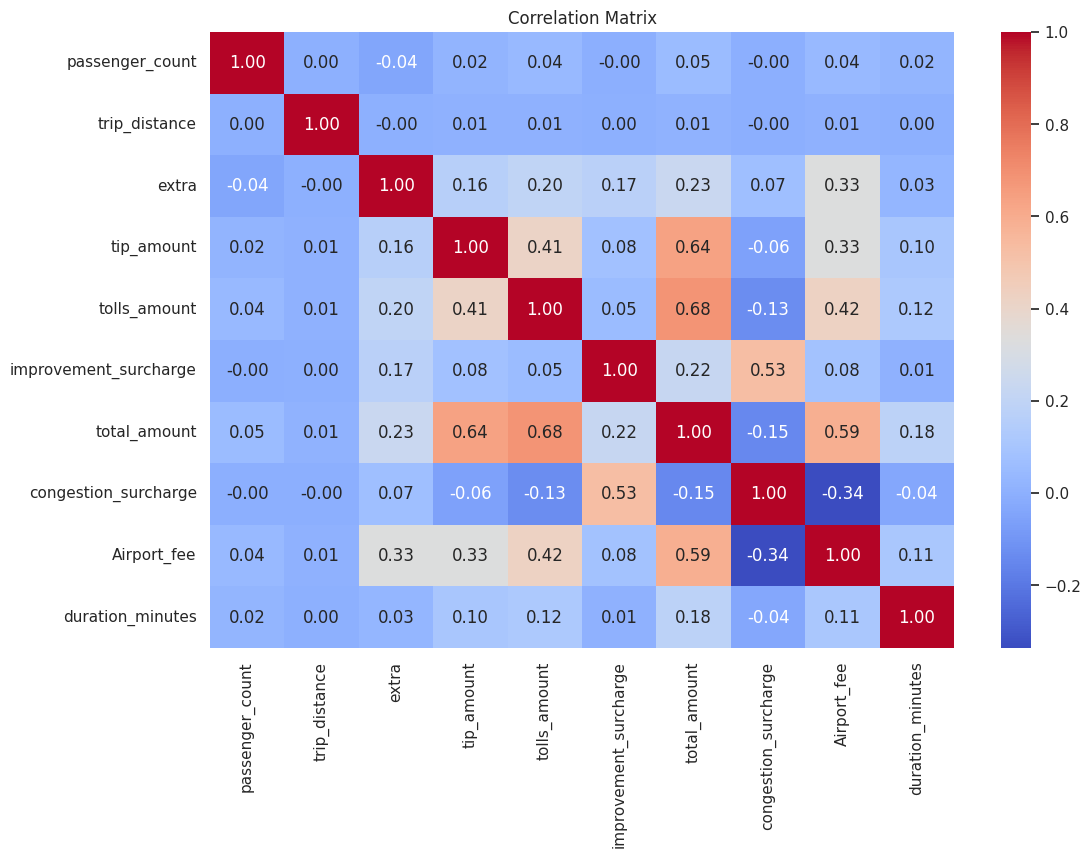

In [36]:
# Selecting only numeric columns for correlation matrix
numeric_columns = train_copy.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_copy[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Frequency Distribution of some numerical columns and some other columns**

In [37]:
# Numerical columns
numerical_columns = ['total_amount','passenger_count', 'trip_distance',  'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Categorical columns
categorical_columns = ['payment_type']


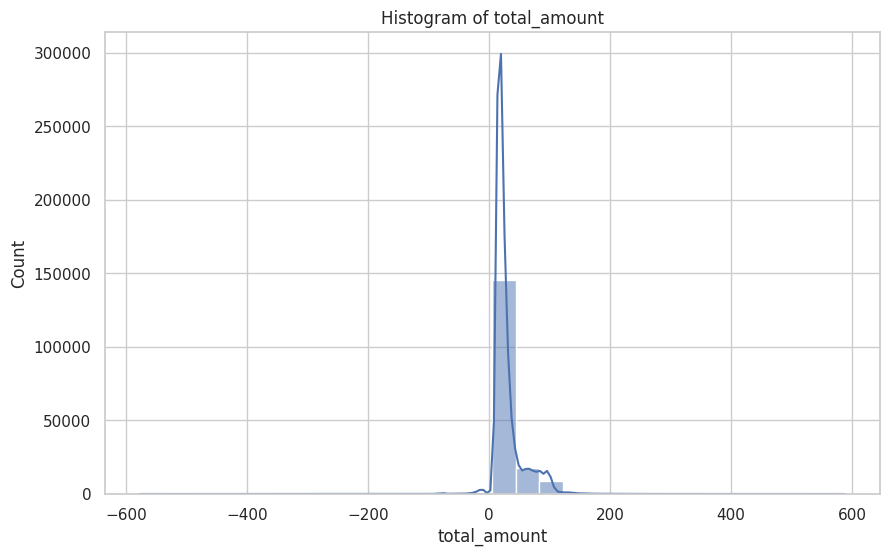

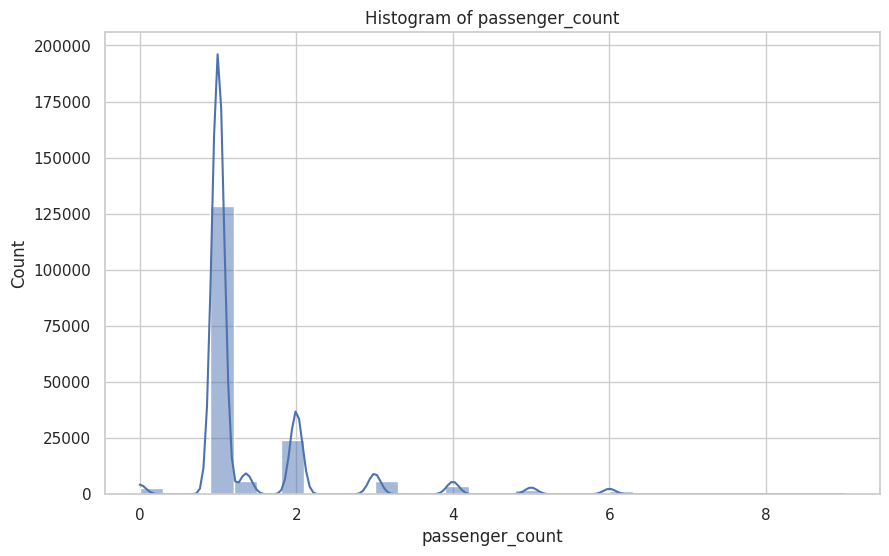

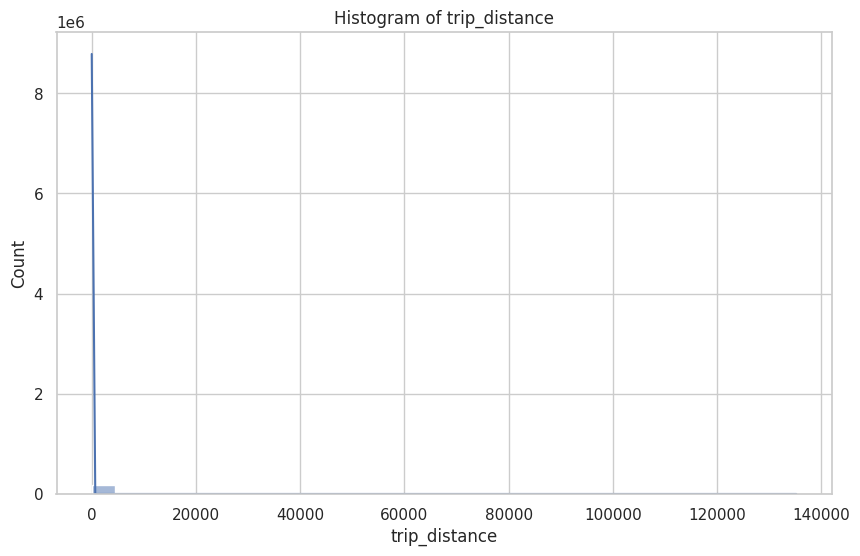

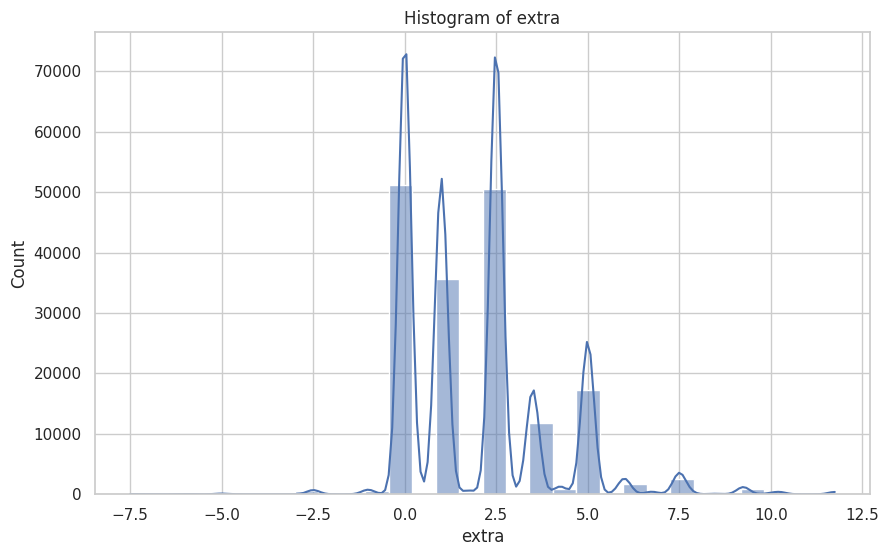

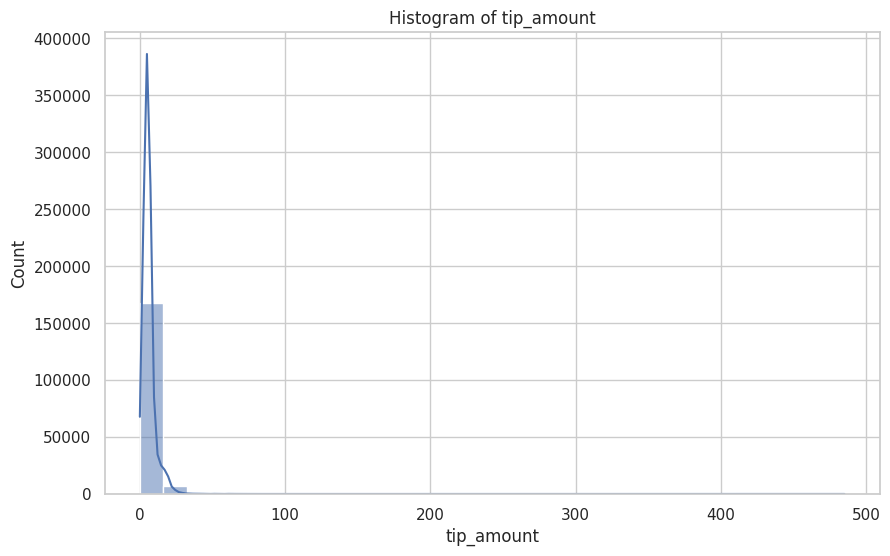

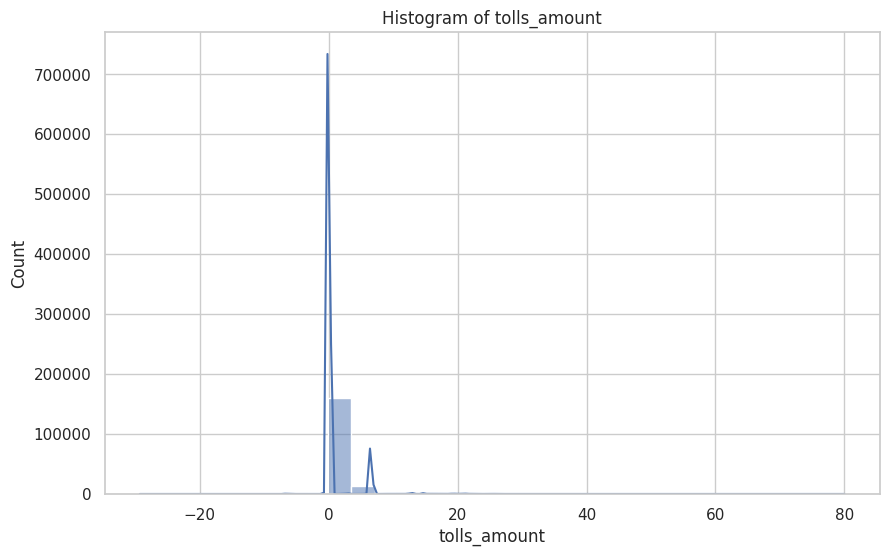

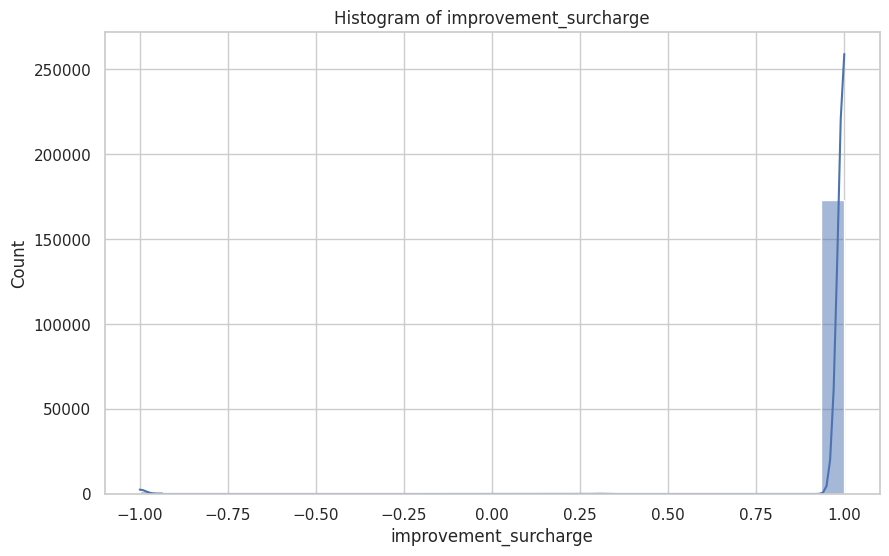

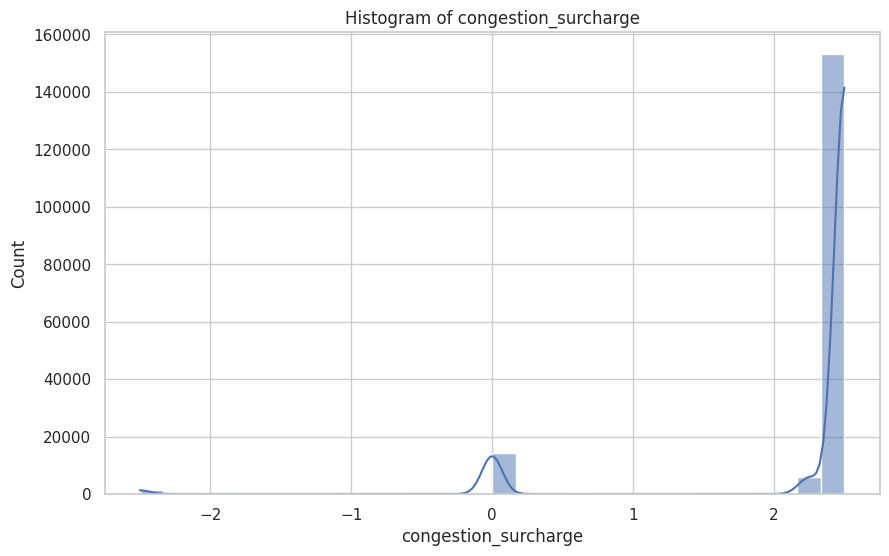

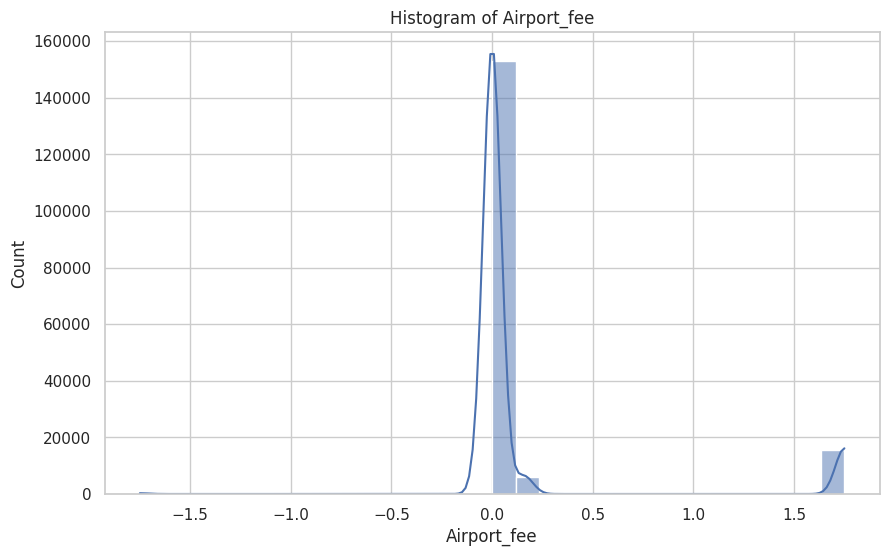

In [38]:
# Plot frequency distribution for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_copy[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

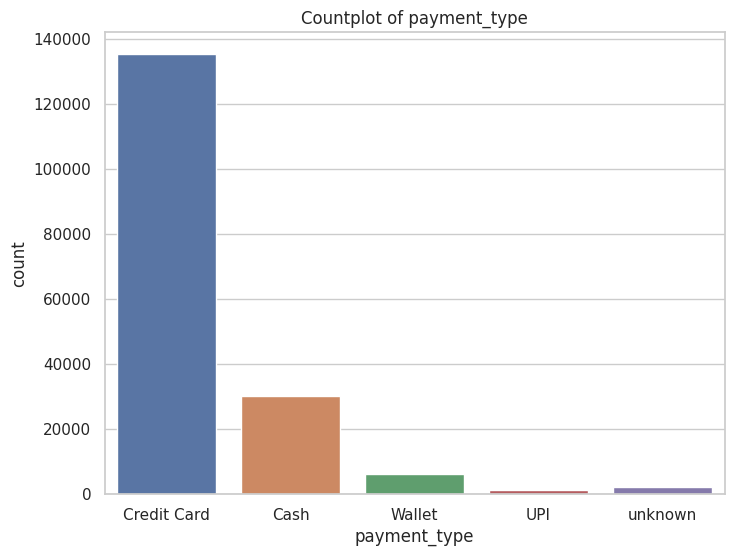

In [39]:
# Plot frequency distribution for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=train_copy)
    plt.title(f'Countplot of {column}')
    plt.show()

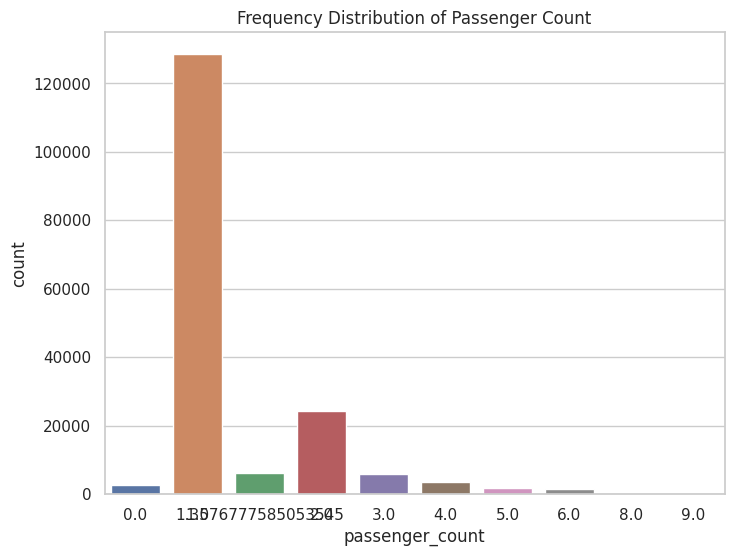

In [40]:
#Frequency distribution for passenger_count
plt.figure(figsize=(8, 6))
sns.countplot(x='passenger_count', data=train_copy)
plt.title('Frequency Distribution of Passenger Count')
plt.show()

# **Label encoder to change categorical to numerical**

In [41]:
print(train_copy.columns)

Index(['passenger_count', 'trip_distance', 'payment_type', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_datetime',
       'dropoff_datetime', 'duration_minutes'],
      dtype='object')


In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#train_copy['store_and_fwd_flag'] = label_encoder.fit_transform(train_copy['store_and_fwd_flag'])
train_copy['payment_type'] = label_encoder.fit_transform(train_copy['payment_type'])
test_copy['payment_type'] = label_encoder.fit_transform(test_copy['payment_type'])
#train_copy['RatecodeID'] = label_encoder.fit_transform(train_copy['RatecodeID'])

# **Applying the models**

In [43]:
import pandas as pd


train_copy['pickup_datetime'] = pd.to_numeric(train_copy['pickup_datetime'].astype(int)) 
train_copy['dropoff_datetime'] = pd.to_numeric(train_copy['dropoff_datetime'].astype(int)) 

test_copy['pickup_datetime'] = pd.to_numeric(test_copy['pickup_datetime'].astype(int)) 
test_copy['dropoff_datetime'] = pd.to_numeric(test_copy['dropoff_datetime'].astype(int))

In [44]:
#spliting the dataset in training and validation sets with train_test_split
from sklearn.model_selection import train_test_split

X = train_copy.drop(columns=['total_amount']) 
y = train_copy['total_amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_testshape:", y_test.shape)

X_train shape: (140000, 12)
X_test shape: (35000, 12)
y_train shape: (140000,)
y_testshape: (35000,)


In [46]:
from sklearn.metrics import r2_score

In [47]:
# from sklearn.linear_model import LinearRegression

# # Initialize the Linear Regression model
# linear_reg_model = LinearRegression()

# # Train the model on the training set
# linear_reg_model.fit(X_train, y_train)

# # Predict on the testing set
# y_pred = linear_reg_model.predict(X_test)

# # Evaluate the model
# r2 = r2_score(y_test, y_pred)


# print("R2 Score:", r2)
# # R2 Score: 0.7354492254748795

In [48]:
# from sklearn.preprocessing import PolynomialFeatures

# # Polynomial Regressor
# poly_features = PolynomialFeatures(degree=2)
# X_poly = poly_features.fit_transform(X_train)
# poly_model = LinearRegression()
# poly_model.fit(X_poly, y_train)
# poly_predictions = poly_model.predict(poly_features.transform(X_test))
# print("Polynomial Regression R2 Score:", r2_score(y_test, poly_predictions))

# #Polynomial Regression R2 Score: 0.8820649035199553

In [49]:
# from sklearn.tree import DecisionTreeRegressor

# # Decision Tree Regressor
# tree_model = DecisionTreeRegressor(random_state=42)
# tree_model.fit(X_train, y_train)
# tree_predictions = tree_model.predict(X_test)
# print("Decision Tree R2 Score:", r2_score(y_test, tree_predictions))

# #Decision Tree R2 Score: 0.8900899615108835

In [50]:
# from sklearn.svm import SVR

# # Support Vector Machine (SVM) Regressor
# svm_model = SVR()
# svm_model.fit(X_train, y_train)
# svm_predictions = svm_model.predict(X_test)
# print("SVM MSE:", mean_squared_error(y_test, svm_predictions))

# SVM MSE: 152.59235088539958

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, forest_predictions))

#Random Forest R2 Score: 0.941250420391111

Random Forest R2 Score: 0.941250420391111


In [52]:
# Running Random Forest Regressor on  test data
test_random_forest = forest_model.predict(test_copy)

In [53]:
# Check the length of test_random_forest
len_test_random_forest = len(test_random_forest)

# Create the DataFrame with the correct length
submission = pd.DataFrame({"ID": np.arange(1, 1 + len_test_random_forest),
                           "total_amount": test_random_forest})

# Save the DataFrame to CSV
submission.to_csv('submission.csv', index=False)

# **Hyperparamters**

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [55]:
test_copy.shape

(50000, 12)

In [56]:
# Create preprocessors for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a new preprocessor that includes SelectKBest
numeric_features = ['passenger_count', 'trip_distance', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'duration_minutes']
categorical_features = ['payment_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('f_reg', SelectKBest(f_regression, k='all'), numeric_features),  # Use f_regression for regression task
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor(random_state=42))])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the R^2 score of the model
print(f"R^2 Score: {pipeline.score(X_test, y_test)}")
#R^2 Score: 0.9366189231640623

R^2 Score: 0.9366189231640623


In [57]:
# # Hyperparameter tuning
# param_dist = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [5, 10, 15],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4],
# }

# random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5)
# random_search.fit(X_train, y_train)

# print("Best Hyperparameters:", random_search.best_params_)

# best_model = random_search.best_estimator_
# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# print(f'R^2 Score on Validation Set: {r2}')

In [58]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_count        50000 non-null  float64
 1   trip_distance          50000 non-null  float64
 2   payment_type           50000 non-null  int64  
 3   extra                  50000 non-null  float64
 4   tip_amount             50000 non-null  float64
 5   tolls_amount           50000 non-null  float64
 6   improvement_surcharge  50000 non-null  float64
 7   congestion_surcharge   50000 non-null  float64
 8   Airport_fee            50000 non-null  float64
 9   pickup_datetime        50000 non-null  int64  
 10  dropoff_datetime       50000 non-null  int64  
 11  duration_minutes       50000 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 4.6 MB


In [59]:
test_copy.shape

(50000, 12)

In [60]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   passenger_count        175000 non-null  float64
 1   trip_distance          175000 non-null  float64
 2   payment_type           175000 non-null  int64  
 3   extra                  175000 non-null  float64
 4   tip_amount             175000 non-null  float64
 5   tolls_amount           175000 non-null  float64
 6   improvement_surcharge  175000 non-null  float64
 7   total_amount           175000 non-null  float64
 8   congestion_surcharge   175000 non-null  float64
 9   Airport_fee            175000 non-null  float64
 10  pickup_datetime        175000 non-null  int64  
 11  dropoff_datetime       175000 non-null  int64  
 12  duration_minutes       175000 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 17.4 MB


In [61]:
test_copy.shape

(50000, 12)

In [62]:
train_copy.shape

(175000, 13)

In [63]:
model_rfr = pipeline.predict(test_copy)

In [64]:
model_rfr

array([37.4526, 23.4628, 15.057 , ..., 20.407 , 37.3129, 17.505 ])

In [65]:
len(model_rfr)

50000

In [66]:
submission = pd.DataFrame({"ID": np.arange(1,50001), 
                           "total_amount": model_rfr}) 

submission.to_csv('submission.csv',index=False)

In [67]:
# model_rfr = pd.DataFrame({
#     "ID": np.arange(1, 31423),
#     "total_amount": model_rfr  
# })

# model_rfr.to_csv('submission.csv', index=False)


# **Feature Importance**

In [68]:
# # Feature Importance
# feature_importance = best_model['regressor'].feature_importances_  # Assuming 'regressor' is the name of your RandomForestRegressor step
# feature_names = X_train.columns

# # Assuming you want to visualize the top 7 features
# top_n = 7

# feature_importance_df = pd.DataFrame({'Feature': feature_names[:top_n], 'Importance': feature_importance[:top_n]})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.title('Feature Importance - Random Forest')
# plt.show()

# **Cross-validation**

In [69]:
# from sklearn.model_selection import cross_val_score

# # Cross-validation with Random Forest for R^2 score
# cv_scores_r2 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
# print("Cross-validation R^2 Scores:", cv_scores_r2)
# print("Mean R^2:", np.mean(cv_scores_r2))